In [8]:
import numpy as np
from keras.layers import Dense, Input, Lambda
from keras.models import Model
from keras.optimizers import adadelta
from keras.regularizers import l1
import pydot
import matplotlib.pyplot as plt 
import keras.backend as K
from keras.losses import binary_crossentropy

In [154]:
def shallow_variational_autoencoder(input_size,embed_size,batch_size):
    
    # encoder 
    
    x_in = Input(shape=(input_size, ))
    X=Dense(512,activation='relu')(x_in)
    Z_mu=Dense(embed_size,activation='relu')(X)
    Z_log_var=Dense(embed_size,activation='relu')(X)
    
    def sampling(args):
        Z_mu , Z_log_var = args
        batch= K.shape(Z_mu)[0]
        dim= K.int_shape(Z_mu)[1]
        epsilon=K.random_normal(shape=(batch,dim), mean=0.0, stddev=1.0)
        return Z_mu+K.exp(0.5*Z_log_var)*epsilon
    
    
    Z = Lambda(sampling, output_shape=(embed_size,))([Z_mu , Z_log_var])  # embedding 
    
    # decoder
    
    decode_1=Dense(512,activation='relu')
    decode_2=Dense(input_size,activation='sigmoid')
    
    h1=decode_1(Z)
    X_mean = decode_2(h1)
    
    
    VAE=Model(inputs = x_in , outputs = X_mean)
    
    #encoder model
    
    encoder = Model (inputs = x_in,outputs= [Z, Z_mu, Z_log_var] )
    
    
    # decoder model
    
    
    decoder_input = Input(shape=(embed_size,))
    _h_decoded = decode_1(decoder_input)
    _x_decoded_mean = decode_2(_h_decoded)
    generator = Model(inputs = decoder_input, outputs= _x_decoded_mean )
    
    
    #deine loss
    
    
    def vae_loss(x_in, X_mean ):
        log_loss=binary_crossentropy(x_in , X_mean)
        log_loss*= input_size
        reg_loss = 1+Z_log_var-K.square(Z_mu)-K.exp(Z_log_var)
        reg_loss = -0.5*K.sum(reg_loss,axis=-1)
        vae_loss = K.mean(log_loss+reg_loss)
        return vae_loss
    
    #compile the model 
    
    VAE.compile(optimizer='adadelta', loss=vae_loss)
   
    
    
    return VAE,encoder, generator


VAE,encoder, generator = shallow_variational_autoencoder(input_size= 784 ,embed_size = 64, batch_size= 128)

In [155]:
VAE.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_41 (Dense)                (None, 512)          401920      input_17[0][0]                   
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 64)           32832       dense_41[0][0]                   
__________________________________________________________________________________________________
dense_43 (Dense)                (None, 64)           32832       dense_41[0][0]                   
__________________________________________________________________________________________________
lambda_9 (

In [156]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_45 (Dense)             (None, 784)               402192    
Total params: 435,472
Trainable params: 435,472
Non-trainable params: 0
_________________________________________________________________


In [157]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [158]:
x_train.shape
    

(60000, 784)

In [159]:
y_train.shape

(60000,)

In [160]:
x_test.shape

(10000, 784)

In [162]:
history= VAE.fit(x_train, x_train,
        shuffle=True,
        epochs=100,
        batch_size=128,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 73us/step - loss: 149.5596 - val_loss: 147.4730
Epoch 2/100
60000/60000 [==============================] - 4s 72us/step - loss: 146.8658 - val_loss: 145.6153
Epoch 3/100
60000/60000 [==============================] - 4s 73us/step - loss: 145.1807 - val_loss: 144.2859
Epoch 4/100
60000/60000 [==============================] - 4s 72us/step - loss: 143.8911 - val_loss: 142.6023
Epoch 5/100
60000/60000 [==============================] - 4s 72us/step - loss: 142.8895 - val_loss: 142.0219
Epoch 6/100
60000/60000 [==============================] - 4s 73us/step - loss: 142.0978 - val_loss: 141.0262
Epoch 7/100
60000/60000 [==============================] - 4s 73us/step - loss: 141.4698 - val_loss: 140.7531
Epoch 8/100
60000/60000 [==============================] - 4s 72us/step - loss: 141.0780 - val_loss: 140.6469
Epoch 9/100
60000/60000 [==============================] - 4s 72us/ste

60000/60000 [==============================] - 4s 72us/step - loss: 135.6006 - val_loss: 135.7320
Epoch 75/100
60000/60000 [==============================] - 4s 74us/step - loss: 135.6465 - val_loss: 135.5109
Epoch 76/100
60000/60000 [==============================] - 4s 72us/step - loss: 135.6250 - val_loss: 135.6106
Epoch 77/100
60000/60000 [==============================] - 4s 72us/step - loss: 135.5408 - val_loss: 135.3202
Epoch 78/100
60000/60000 [==============================] - 4s 74us/step - loss: 135.4938 - val_loss: 135.5959
Epoch 79/100
60000/60000 [==============================] - 4s 72us/step - loss: 135.4423 - val_loss: 135.6487
Epoch 80/100
60000/60000 [==============================] - 4s 72us/step - loss: 135.5204 - val_loss: 135.8090
Epoch 81/100
60000/60000 [==============================] - 4s 72us/step - loss: 135.4939 - val_loss: 135.0356
Epoch 82/100
60000/60000 [==============================] - 4s 73us/step - loss: 135.4353 - val_loss: 135.7478
Epoch 83/100
6

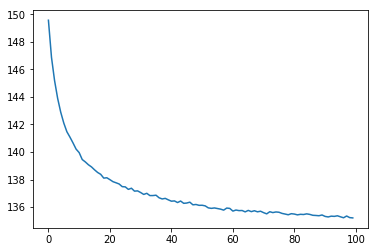

In [163]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

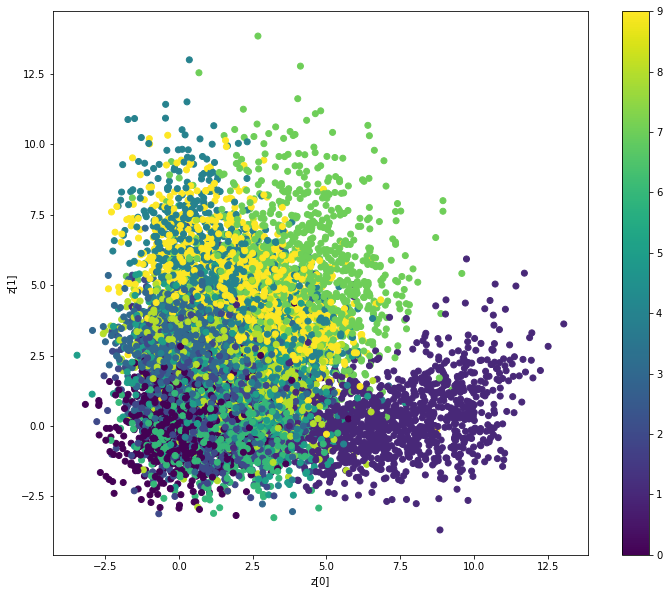

In [69]:
def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as a function of the 2D latent vector
    # Arguments
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    #s.makedirs(model_name, exist_ok=True)

    #ilename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    #lt.savefig(filename)
    plt.show()
    
    
models=[encoder,generator]
data = x_test,y_test


plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist")

In [121]:
n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
grid_x = np.linspace(-2.5, 2.5, n)
grid_y = np.linspace(-2.5, 7.5, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
start_range = digit_size // 2
end_range = n * digit_size + start_range + 1
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.imshow(figure, cmap='Greys_r')
plt.savefig(filename)
plt.show()

ValueError: Error when checking input: expected input_16 to have shape (8,) but got array with shape (2,)

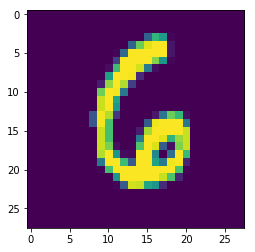

In [196]:
def model_generation(model,image):
    recon_image = model.predict(image)
    return recon_image



index=np.random.randint(0,100)    
image=x_test[index]
image.shape
image=np.expand_dims(image,axis=0)
image.shape    

recon_image=model_generation(VAE,image)

or_image= image.reshape(image.shape[0],28,28,1)
recon_image=recon_image.reshape(recon_image.shape[0],28,28,1)

plt.figure
plt.imshow(or_image[0].reshape(28,28))

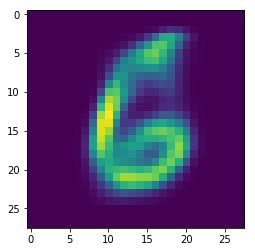

In [197]:
plt.figure
plt.imshow(recon_image[0].reshape(28,28))